### 1.5 난수 발생과 카운팅

In [1]:
import numpy as np

- 시드 설정

In [2]:
np.random.seed(2023)
np.random.random(5)

array([0.3219883 , 0.89042245, 0.58805226, 0.12659609, 0.14134122])

- 데이터의 순서 바꾸기

In [3]:
x = np.arange(10)
np.random.shuffle(x)        # x 데이터의 순서를 바꿈

x

array([7, 4, 3, 2, 8, 9, 1, 6, 0, 5])

- 데이터의 샘플링

In [9]:
np.random.choice(10, 5, replace=False) #replace=False: 비복원 추출

array([9, 0, 7, 5, 1])

In [10]:
np.random.choice(10, 5, replace=True) #replace=True: 복원 추출

array([3, 3, 8, 5, 9])

In [12]:
x = np.random.randint(1, 100, 10)  # 1 <= x < 100
x

array([38, 64, 26, 37, 41, 86, 83,  6, 94, 80])

In [13]:
np.random.choice(x, 5, replace=False)

array([83, 80, 37,  6, 86])

- 난수 생성

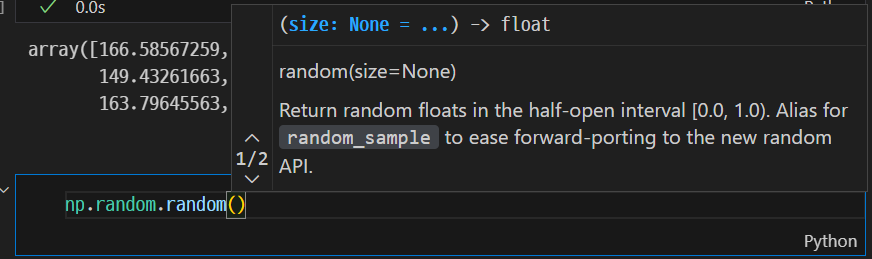

In [18]:
# random(N) - Uniform 분포, 0~1 사이의 값 N개
np.random.random(10)

array([0.64975844, 0.98406337, 0.02745077, 0.16956904, 0.54404185,
       0.45166757, 0.64670396, 0.97884048, 0.25399558, 0.6804454 ])

In [19]:
# randint(low, high, N) - [low, high) 범위의 정수 N개
np.random.randint(1, 7, 10)

array([3, 5, 1, 4, 3, 6, 6, 4, 4, 4])

In [20]:
# normal(평균, 표준편차, N) - 정규분포 N개
np.random.normal(170, 10, 10)

array([166.58567259, 174.9889444 , 172.48088999, 167.27529232,
       149.43261663, 165.60764653, 169.2262293 , 177.35894736,
       163.79645563, 169.92165456])

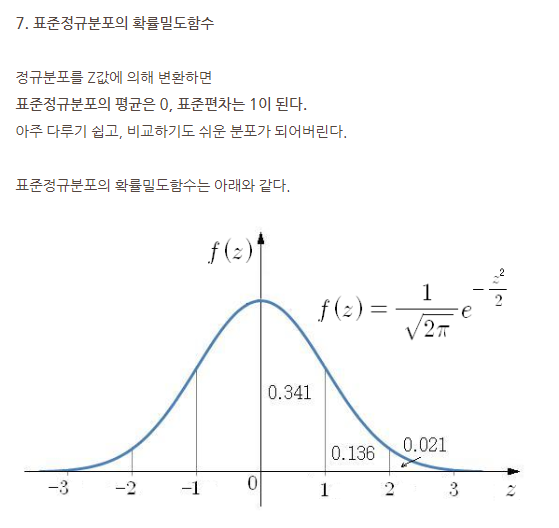

In [21]:
# randn - 표준정규분포 N(0, 1) N개
np.random.randn()

array([ 0.10239775, -1.02793968, -0.12819896, -0.28612641,  1.40919268,
       -1.57623292, -0.43851193,  0.44780508, -0.67357974,  1.02458572])

In [22]:
# binomial(시도횟수, 평균, N) - 이항분포 N개
np.random.binomial(10, 0.5, 20).reshape(4, 5)

array([[6, 7, 4, 9, 4],
       [7, 6, 2, 4, 7],
       [6, 7, 6, 3, 2],
       [4, 4, 6, 5, 5]])

In [23]:
# 가설검정: t-검정 (1-sample T, 2-sample T, paired T)
# Student t(자유도, N)
np.random.standard_t(2,10)

array([-1.41928566, -0.96838319,  1.74574551, -1.12146016,  0.53222103,
        1.38778627,  0.56246403,  1.13057416, -0.25470204,  1.93380805])

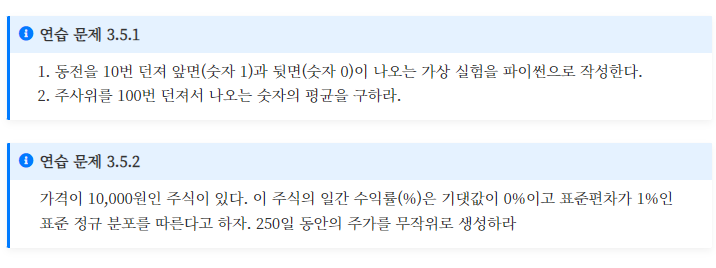

- 연습문제 3.5.1


In [27]:
# 1. 동전을 10번 던져 앞면(숫자 1)과 뒷면(숫자 0)이 나오는 가상 실험을 파이썬으로 작성
np.random.binomial(1, 0.5, 10)

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [28]:
# 2. 주사위를 100번 던져서 나오는 숫자의 평균을 구하라.
dice = np.random.randint(1, 7, 100)
np.mean(dice)

3.54

- 연습문제 3.5.2

In [53]:
# 5개만 먼저 테스트
rate = np.random.randn(5)
rate

array([-0.42590251,  1.18631986,  0.77581058, -0.50190694, -1.482155  ])

In [54]:
price = 10000
for i in range(5):
    price = price + price * rate[i] * 0.01      # 누적해서 쌓이는 이자..(복리..)
    print(round(price, 2), end = ' ')

9957.41 10075.54 10153.7 10102.74 9953.0 

In [55]:
price = 10000
for i in range(5):
    price = price * (1 + rate[i])      # price * (1 + r)
    print(round(price, 2), end = ' ')

5740.97 12551.61 22289.28 11102.13 -5352.95 

In [57]:
# 5개만 먼저 테스트
rate = np.random.normal(0, 0.01, 5)
rate

array([0.01088693, 0.00912328, 0.002533  , 0.00123772, 0.01842395])

In [77]:
price = 10000
for i in range(5):
    price = price * (1 + rate[i])   # price * (1 + r)
    price = int(round(price, 0))    # 가격의 단위는 원(소숫점 아래 자리는 버림)
    print(price, end=' ')

10071 10038 9937 9960 9950 

In [62]:
# 250개의 수익률 생성
np.random.seed(2023)
rate = np.random.normal(0, 0.01, 250)
rate[:5]

array([ 0.00711674, -0.00324485, -0.01001871,  0.00236251, -0.0010216 ])

In [63]:
#1. 리스트로 해결
price = 10000
price_list = []         # append로 추가
for i in range(250):
    price = price * (1 + rate[i])
    price = int(round(price, 0))
    price_list.append(price)

price_list[-10:]                  #  수익률...+ 됐다..

[10814, 10893, 10674, 10645, 10588, 10724, 10739, 10686, 10691, 10497]

In [69]:
# 2. Array로 해결
price = 10000
price_array = np.empty(250, dtype=int)      # 들어갈 집을 만들어 놓고 채우기
for i in range(250):
    price = price * (1 + rate[i])
    price = int(round(price, 0))
    price_array[i] = price

price_array[-10:]

array([10814, 10893, 10674, 10645, 10588, 10724, 10739, 10686, 10691,
       10497])

- 데이터 카운팅

In [70]:
np.random.seed(2023)
dices = np.random.randint(1, 7, 100)

In [71]:
# 고유한 값
np.unique(dices)

array([1, 2, 3, 4, 5, 6])

In [72]:
# 고유한 값과 돗수
np.unique(dices, return_counts=True)

(array([1, 2, 3, 4, 5, 6]), array([16, 18, 13, 15, 19, 19], dtype=int64))

In [73]:
indices, count = np.unique(dices, return_counts=True)
indices * count

array([ 16,  36,  39,  60,  95, 114], dtype=int64)

In [74]:
# 가중 평균
np.sum(indices * count) / np.sum(count)

3.6

In [75]:
np.mean(dices)

3.6

In [76]:
a = np.array(['x', 'y', 'x', 'y', 'z', 'y'])
np.unique(a, return_counts=True)
# 유니크는 하나씩만 뽑아옴

(array(['x', 'y', 'z'], dtype='<U1'), array([2, 3, 1], dtype=int64))